<a href="https://colab.research.google.com/github/dmzapata1/Ciencia_de_Datos/blob/main/Proyecto_Arbol_de_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/drive/MyDrive/A2_MACHINE_LEARNING/CAPITULO_6_ARBOL_DE_DECISION/Comediantes.csv')

In [6]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [7]:
# Transformamos las variables categóricas usando LabelEncoder

In [8]:
# Definimos las variables categóricas:
variables = ['Nationality', 'Go']

In [11]:
# Definimos una función que aplique el encoder:
def label_encoder(datos_categoria):
  le = LabelEncoder()
  df[datos_categoria] = le.fit_transform(df[datos_categoria])

In [12]:
# Aplicamos a cada variable con un ciclo for
for i in variables:
  label_encoder(i)

In [13]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [14]:
# Separamos el dataframe en x, y:
x = df.drop('Go', axis=1)
y = df['Go']

In [15]:
x

,Age,Experience,Rank,Nationality
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2
5,44,14,5,1
6,66,3,7,0
7,35,14,9,1
8,52,13,7,0
9,35,5,9,0


In [16]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [17]:
# Instanciamos el árbol
from sklearn.tree import DecisionTreeClassifier

In [31]:
arbol = DecisionTreeClassifier(criterion='gini')

In [32]:
arbol.fit(x,y)

DecisionTreeClassifier()

In [33]:
from sklearn import tree

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

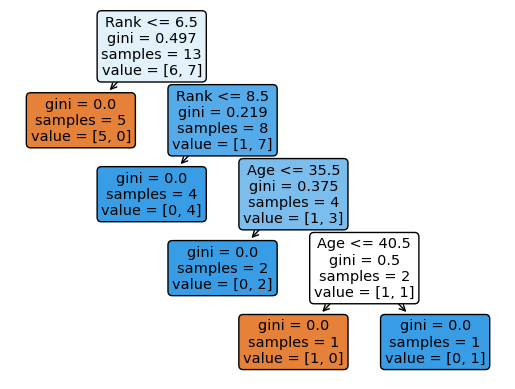

In [34]:
tree.plot_tree(arbol, feature_names=x.columns,rounded=True,filled=True)

In [35]:
y_pred = arbol.predict(x)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y,y_pred)

array([[6, 0],
       [0, 7]])

In [38]:
y.value_counts()

1    7
0    6
Name: Go, dtype: int64

In [39]:
# Sobreajuste del modelo.

# Probabilidades

In [40]:
arbol.predict_proba([[40,10,7,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [46]:
arbol.predict_proba([[20,10,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [47]:
# Esta clasificando por la edad.

In [48]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [49]:
x=df.drop('Age',axis=1)

In [50]:
y=df['Age']

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
arbol = DecisionTreeRegressor(max_depth=3)

In [53]:
arbol.fit(x,y)

DecisionTreeRegressor(max_depth=3)

In [55]:
y_pred = arbol.predict(x)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
error = mean_squared_error(y, y_pred,squared=False)

In [59]:
error/y.mean()

0.21773779286495132

In [60]:
y_real = pd.DataFrame(y)

In [61]:
y_real

,Age
0,36
1,42
2,23
3,52
4,43
5,44
6,66
7,35
8,52
9,35


In [62]:
y_pred2 = pd.DataFrame(y_pred)

In [63]:
y_pred2

,0
0,40.00
1,42.00
2,23.50
3,52.00
4,35.25
5,40.00
6,51.00
7,35.25
8,51.00
9,51.00


<function matplotlib.pyplot.show(close=None, block=None)>

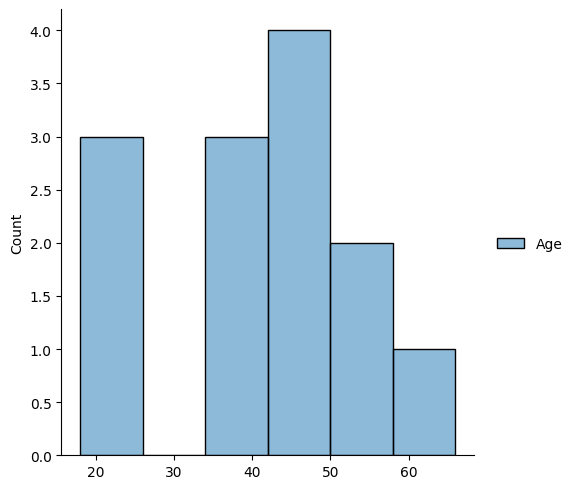

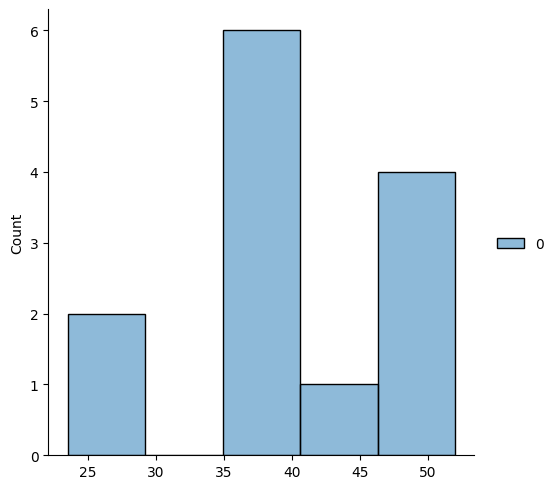

In [66]:
sns.displot(y_real)
sns.displot(y_pred2)
plt.show()

In [67]:
arbol = DecisionTreeRegressor(max_depth=2)

In [68]:
arbol.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [70]:
y_pred = arbol.predict(x)

In [73]:
error = mean_squared_error(y,y_pred,squared=False)

In [74]:
error/y.mean()

0.2856531114235967

In [75]:
# El error aumenta

[Text(0.5, 0.8333333333333334, 'Rank <= 4.5\nsquared_error = 162.391\nsamples = 13\nvalue = 39.615'),
 Text(0.25, 0.5, 'Experience <= 8.0\nsquared_error = 25.0\nsamples = 2\nvalue = 47.0'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 52.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 42.0'),
 Text(0.75, 0.5, 'Go <= 0.5\nsquared_error = 175.653\nsamples = 11\nvalue = 38.273'),
 Text(0.625, 0.16666666666666666, 'squared_error = 76.188\nsamples = 4\nvalue = 31.75'),
 Text(0.875, 0.16666666666666666, 'squared_error = 194.286\nsamples = 7\nvalue = 42.0')]

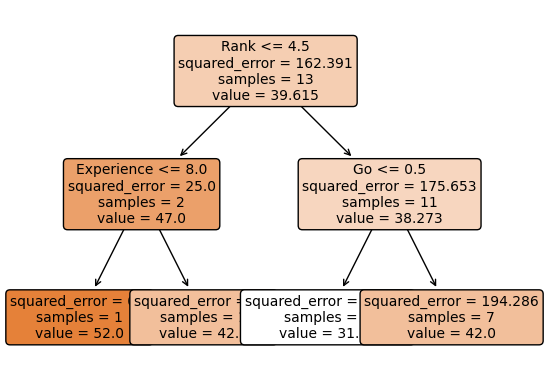

In [80]:
tree.plot_tree(arbol,rounded=True,filled=True, feature_names=x.columns, fontsize=10)